### Looping Graph

In [22]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [23]:
class AgentState(TypedDict):
    name: str
    random_numbers: List[int]
    counter: int

In [25]:
def greeting_node(state: AgentState)->AgentState:
    """Greeting node that says hi to the person."""
    state['name'] = f"Hi {state['name']}!"
    state['counter'] = 0
    return state

def generate_random_numbers_node(state: AgentState) -> AgentState:
    """Generated a 5 random numbers from 1 to 10."""
    state['random_numbers'].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def should_continue(state:AgentState):
    """Function to decide what to do next."""
    if state['counter'] < 5:
        return 'loop'
    else:
        return "exit"

In [26]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("generate_random_numbers_node", generate_random_numbers_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "generate_random_numbers_node")

graph.add_conditional_edges(
    'generate_random_numbers_node',
    should_continue,
    {
        'loop': 'generate_random_numbers_node',
        'exit': END
    }
)

In [27]:
app = graph.compile()

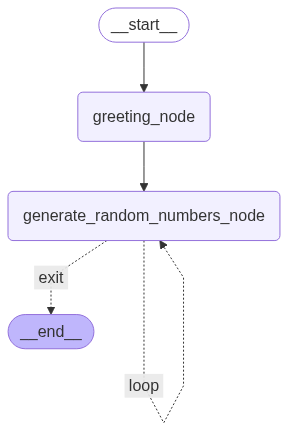

In [28]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
result = app.invoke({
    'name': 'Muhammad Abdullah',
    'random_numbers': [],
    'counter': -2
})
print("Final Result:", result)

Final Result: {'name': 'Hi Muhammad Abdullah!', 'random_numbers': [2, 3, 6, 3, 4], 'counter': 5}
